In [22]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection, naive_bayes, svm
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
import csv
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv("dataset.csv")
#DataFlair - Get the labels
labels=df.label
labels.head()

0    False
1     True
2     True
3     True
4     True
Name: label, dtype: bool

In [24]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['finaltext'], labels, test_size=0.2, random_state=7)

In [25]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train).toarray()
tfidf_test=tfidf_vectorizer.transform(x_test).toarray()

In [26]:
terms = tfidf_vectorizer.get_feature_names()
# sum tfidf frequency of each term through documents
sums = tfidf_train.sum(axis=0)
# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

C:\Users\Monique\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,rank
1527,covid19,242.940196
1514,corona,199.830409
6320,vaksin,183.392105
5083,ri,167.428751
4303,omicron,137.292826
...,...,...
4232,nose,0.236800
2134,ge,0.236800
523,999,0.236800
630,akurasi,0.236800


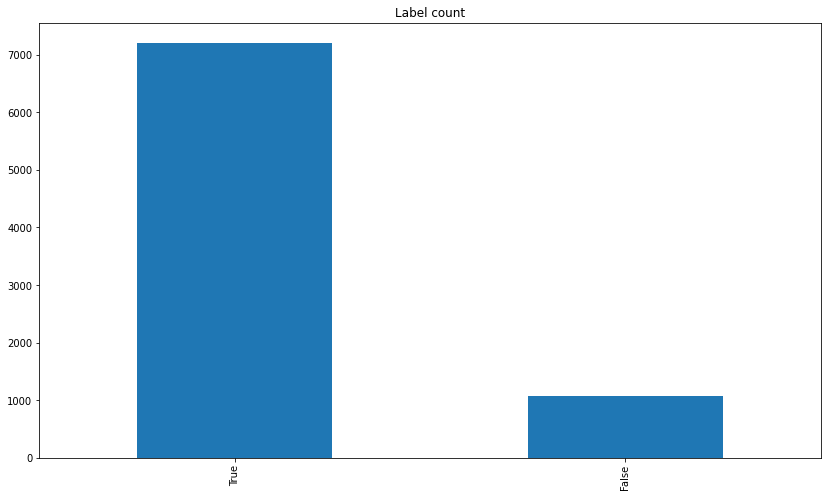

In [27]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label count")

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(tfidf_train, y_train)
y_oversample

0         True
1         True
2         True
3         True
4         True
         ...  
11543    False
11544    False
11545    False
11546    False
11547    False
Name: label, Length: 11548, dtype: bool

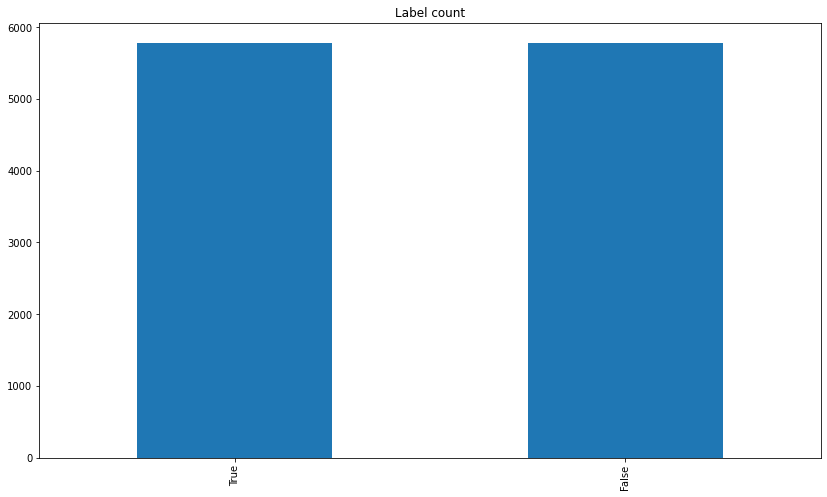

In [29]:
oversample_df = pd.DataFrame(y_oversample)
ax = oversample_df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Label count")

In [30]:
# c = [0.08, 1.0, 3.0, 10.0]
# data = []
# for k in range(10):
#     accuracy = []
#     for i in c:
#         scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=i, penalty='l2',max_iter=1000)
#         scikit_log_reg.fit(X_oversample,y_oversample)
#         y_pred = scikit_log_reg.predict(tfidf_test)# Use accuracy_score function to get the accuracy
#         score=accuracy_score(y_test,y_pred)
#         print(classification_report(y_test, y_pred))
#         print(f'Accuracy: {round(score*100,2)}%')
#         accuracy.append(round(score*100,2))
#         #DataFlair - Build confusion matrix
#         confusion_matrix(y_test,y_pred)
#     data.append(accuracy)

# with open('logreg_tfidf.csv', 'w') as f:
      
#     # using csv.writer method from CSV package
#     write = csv.writer(f)
#     write.writerow(c)
#     write.writerows(data)

[LibLinear]              precision    recall  f1-score   support

       False       0.62      0.79      0.70       229
        True       0.97      0.92      0.94      1426

    accuracy                           0.90      1655
   macro avg       0.79      0.86      0.82      1655
weighted avg       0.92      0.90      0.91      1655

Accuracy: 90.39%
[LibLinear]              precision    recall  f1-score   support

       False       0.70      0.79      0.74       229
        True       0.97      0.94      0.96      1426

    accuracy                           0.92      1655
   macro avg       0.83      0.87      0.85      1655
weighted avg       0.93      0.92      0.93      1655

Accuracy: 92.39%
[LibLinear]              precision    recall  f1-score   support

       False       0.72      0.78      0.75       229
        True       0.96      0.95      0.96      1426

    accuracy                           0.93      1655
   macro avg       0.84      0.86      0.85      1655
weighte

In [33]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=10, penalty='l2',max_iter=1000)
scikit_log_reg.fit(X_oversample,y_oversample)
y_pred = scikit_log_reg.predict(tfidf_test)# Use accuracy_score function to get the accuracy
score=accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {round(score*100,2)}%')
#DataFlair - Build confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)

[LibLinear]              precision    recall  f1-score   support

       False       0.75      0.76      0.76       229
        True       0.96      0.96      0.96      1426

    accuracy                           0.93      1655
   macro avg       0.85      0.86      0.86      1655
weighted avg       0.93      0.93      0.93      1655

Accuracy: 93.17%


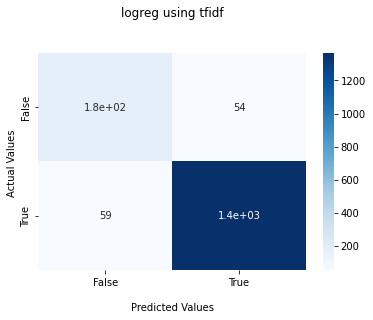

In [34]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('logreg using tfidf\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()